##Strip 전략
Strip 전략은 콜 옵션과 풋 옵션을 모두 매수하는 전략으로, 일반적으로 풋 옵션을 더 많이 매수하여 하락장에서 더 큰 이익을 추구합니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-f8afd2c2d54a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-f8afd2c2d54a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Option Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_call,
<ipython-input-1-f8afd2c2d54a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

            Stock Price  Stock Return  Strip Profit  Strip Return
Date                                                             
2023-01-03   125.070000      0.000000     36.860001      0.000000
2023-01-04   126.360001      0.010314     34.279999      0.274087
2023-01-05   125.019997     -0.010605     36.960007      0.292498
2023-01-06   129.619995      0.036794     27.760010      0.222045
2023-01-09   130.149994      0.004089     26.700012      0.205987
...                 ...           ...           ...           ...
2023-12-22   193.600006     -0.005547     30.600006      0.157181
2023-12-26   193.050003     -0.002841     30.050003      0.155217
2023-12-27   193.149994      0.000518     30.149994      0.156177
2023-12-28   193.580002      0.002226     30.580002      0.158323
2023-12-29   192.529999     -0.005424     29.529999      0.152547

[250 rows x 4 columns]


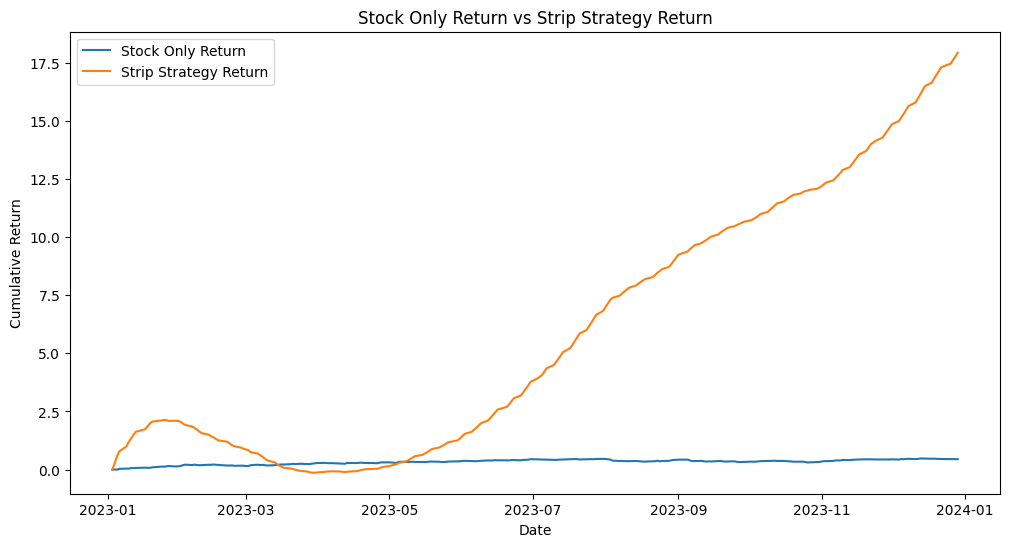

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Strip 설정
strike_price_call = 150
strike_price_put = 150
premium_paid_call = 5   # 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_paid_put = 4    # 풋 옵션 매수 시 지불한 프리미엄 (예시, 2배 매수)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Strip 수익 계산 함수
def calculate_strip(stock_data, strike_price_call, strike_price_put, premium_paid_call, premium_paid_put):
    # 콜 옵션 손익 계산
    stock_data['Call Option Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_call,
                                                     stock_data['Stock Price'] - strike_price_call,
                                                     0) - premium_paid_call
    # 풋 옵션 손익 계산 (풋 옵션 2배 매수)
    stock_data['Put Option Profit/Loss'] = 2 * (np.where(stock_data['Stock Price'] < strike_price_put,
                                                         strike_price_put - stock_data['Stock Price'],
                                                         0) - premium_paid_put)

    # Strip 전략의 총 수익 계산
    stock_data['Strip Profit'] = stock_data['Call Option Profit/Loss'] + stock_data['Put Option Profit/Loss']

    # 총 수익률 계산
    stock_data['Strip Return'] = stock_data['Strip Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Strip Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
strip_results = calculate_strip(data, strike_price_call, strike_price_put, premium_paid_call, premium_paid_put)

# 결과 출력
print(strip_results[['Stock Price', 'Stock Return', 'Strip Profit', 'Strip Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(strip_results.index, strip_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(strip_results.index, strip_results['Strip Return'].cumsum(), label='Strip Strategy Return')
plt.title('Stock Only Return vs Strip Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
